In [ ]:
#Exploratory data analysis of the data that was collected from CARLA

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv(r"C:\Users\mk20459\Documents\DataCSV\03042021.csv", header=None)

In [4]:
df = data.rename(columns={0:"ID", 1:"steer", 2:"throttle", 3:"brake"})

In [5]:
df

ID     steer  throttle  brake
0          0 -0.005393  0.379942    0.0
1          1  0.070203  0.380394    0.0
2          2  0.082057  0.379945    0.0
3          3  0.085445  0.380113    0.0
4          4  0.109264  0.380612    0.0
...      ...       ...       ...    ...
10835  10835  0.010397  0.000000    1.0
10836  10836  0.010397  0.000000    1.0
10837  10837  0.011027  0.700000    0.0
10838  10838 -0.058592  0.379904    0.0
10839  10839 -0.125595  0.384437    0.0

[10840 rows x 4 columns]

In [7]:
df.skew(axis = 0, skipna = True)

ID          0.000000
steer       1.115356
throttle   -0.574391
brake       1.197857
dtype: float64

In [32]:
import numpy as np
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
%matplotlib inline

In [33]:
x = numpy.std(df['steer'])

print(x)

0.11577943208318699


array([[<AxesSubplot:title={'center':'steer'}>]], dtype=object)

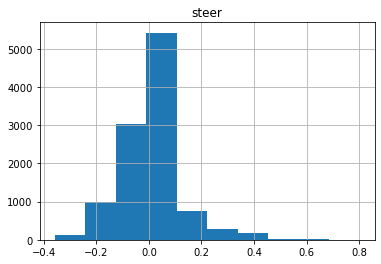

In [10]:
# Histogram showing the range of steering inputs from the autopilot
df.hist(column='steer')

From the histogram it would appear that the frequency of the steering inputs does equal out, but from the box plot below that it highlights that there is a far greater spread for the right turning (I'm under the presumption that positive is right and negative is left.)

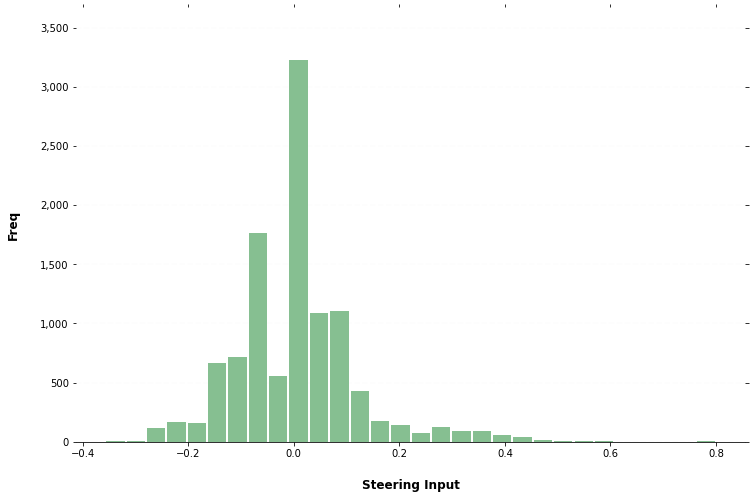

In [19]:
ax = df.hist(column='steer', bins=30, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.1, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Steering Input", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Freq", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

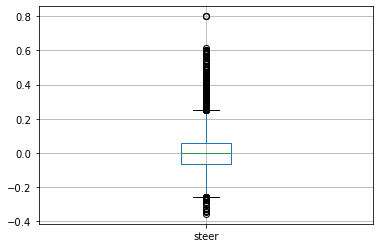

In [21]:
# Box plot to highlight the outliers from the steering dataset
df.boxplot(column=['steer'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


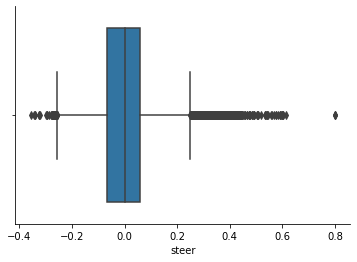

In [23]:
# Box plot to highlight the outliers from the steering dataset
sns.boxplot(df['steer']) 
sns.despine()

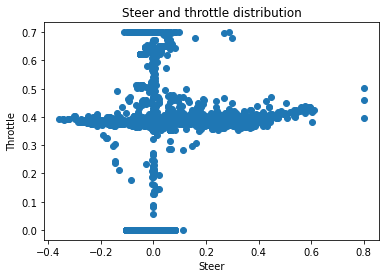

In [30]:
##################################################
# The plot below is just showing that when the vehicle is steering or making a turn that the speed is dropped down to 0.4
# It also highlights the few outliers that are present.

#Variable
plt.scatter(df['steer'],df['throttle'])
#Labels and Tit
plt.title('Steer and throttle distribution')
plt.xlabel('Steer')
plt.ylabel('Throttle')
plt.show()

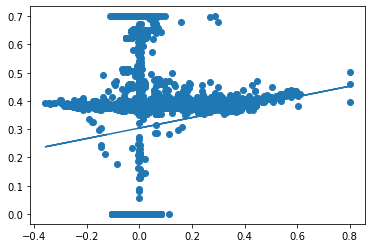

In [34]:
#Similar to the plot above, but this time a line of best fit has also been added

import matplotlib.pyplot as plt
from scipy import stats

x = df['steer']
y = df['throttle']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [36]:
df1 = df[df.brake != 1]

In [38]:
df1.shape

(8209, 4)

In [39]:
df.shape

(10840, 4)

In [ ]:
######################################################
## Now any record where the braking force is applied has been removed just to remove the noise in the graphs

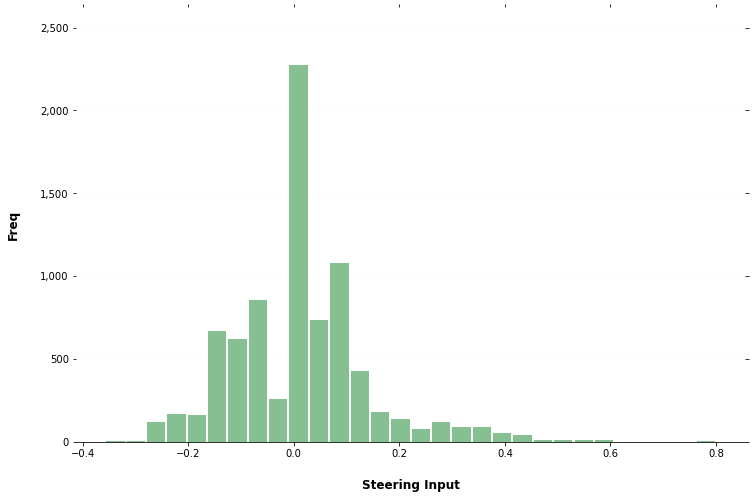

In [40]:
ax = df1.hist(column='steer', bins=30, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.1, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Steering Input", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Freq", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

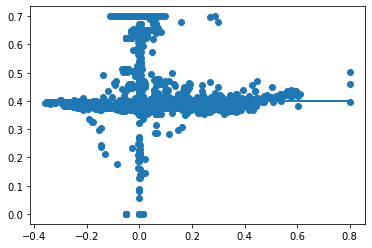

In [41]:
import matplotlib.pyplot as plt
from scipy import stats

x = df1['steer']
y = df1['throttle']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


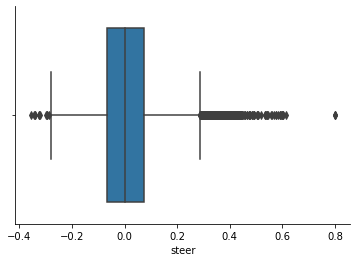

In [42]:
sns.boxplot(df1['steer']) 
sns.despine()